# Main Library

In [1]:
# Reading Data
import json, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing 
import re, nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Building Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GlobalAveragePooling1D
import tensorflow.keras as k

# Download Model
import pickle

# Reading Data

In [2]:
data = pd.read_json(r"Sarcasm_Headlines_Dataset.json", lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
data.drop(columns="article_link", axis=1, inplace=True)
data.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
data["headline"][0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


Data Do not Have Null Value

##### Preprocessing in Data

Removing Stop Word And Punctuation And Make Lemmetization

1 - Stop Word

2 - Punctuation

3 - Lemmatization

In [6]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")
lemma = WordNetLemmatizer()

In [7]:
def Process(data):
    data.lower()
    
    data = " ".join([lemma.lemmatize(word) for word in word_tokenize(data) if ((word not in punc) and (word not in stop_words))])
    
    data = re.sub("[^a-z]", " ", data)
    
    return data

In [8]:
data["headline"] = data["headline"].apply(Process)
data.head(5)

,headline,is_sarcastic
0,former versace store clerk sue secret black c...,0
1,roseanne revival catch thorny political mood ...,0
2,mom starting fear son s web series closest th...,1
3,boehner want wife listen come alternative debt...,1
4,j k rowling wish snape happy birthday magical...,0


##### To Categorical 
To Make Transform From 1output Label --> Len*Ouput (One Hot Encoder)

In [9]:
label = to_categorical(data["is_sarcastic"], 2)
label[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Make Tokenization

In [10]:
X = data["headline"]
Y = label
print(Y[:2])

[[1. 0.]
 [1. 0.]]


In [11]:
tokenize = Tokenizer(oov_token="<oov>")
tokenize.fit_on_texts(X)
word_idx = tokenize.word_index

data_seqence = tokenize.texts_to_sequences(X)
pad_seq = pad_sequences(data_seqence, padding="pre", truncating="pre")

print("The Padding Sequance Shape is  --> ", pad_seq.shape)

The Padding Sequance Shape is  -->  (26709, 31)


In [12]:
input_length = max(len(seq) for seq in data_seqence)

vocabulary_size = len(word_idx) + 1

input_length, vocabulary_size

(31, 22043)

# Splitting Data To Training And Testing

In [13]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, label, train_size=0.7)

# Building Deep Learning Model

In [14]:
model = k.models.Sequential([
    Embedding(vocabulary_size, 50, input_length=input_length),
    GlobalAveragePooling1D(),
    Dense(48, activation="relu"), 
    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss=k.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=2)

Train on 18696 samples, validate on 8013 samples
Epoch 1/20
18696/18696 - 14s - loss: 0.5675 - accuracy: 0.6894 - val_loss: 0.4595 - val_accuracy: 0.7881
Epoch 2/20
18696/18696 - 12s - loss: 0.3336 - accuracy: 0.8578 - val_loss: 0.4389 - val_accuracy: 0.8026
Epoch 3/20
18696/18696 - 11s - loss: 0.2273 - accuracy: 0.9081 - val_loss: 0.4965 - val_accuracy: 0.7958
Epoch 4/20
18696/18696 - 11s - loss: 0.1649 - accuracy: 0.9385 - val_loss: 0.5941 - val_accuracy: 0.7731
Epoch 5/20
18696/18696 - 11s - loss: 0.1211 - accuracy: 0.9569 - val_loss: 0.6543 - val_accuracy: 0.7775
Epoch 6/20
18696/18696 - 11s - loss: 0.0930 - accuracy: 0.9684 - val_loss: 0.7382 - val_accuracy: 0.7765
Epoch 7/20
18696/18696 - 11s - loss: 0.0718 - accuracy: 0.9765 - val_loss: 0.8411 - val_accuracy: 0.7735
Epoch 8/20
18696/18696 - 11s - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.9379 - val_accuracy: 0.7732
Epoch 9/20
18696/18696 - 11s - loss: 0.0471 - accuracy: 0.9845 - val_loss: 1.0500 - val_accuracy: 0.7705
Epoch 

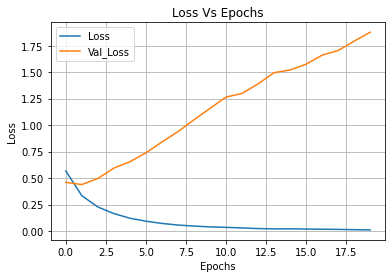

In [16]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

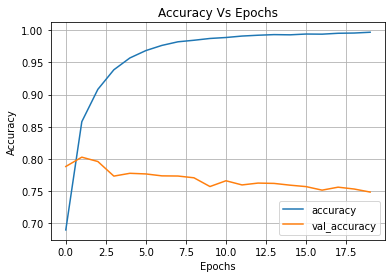

In [17]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# System Prediction

In [18]:
text = word_tokenize(input())

new_text = ""
for word in text:
    if (word not in stop_words) and (word not in punc):
        new_text += lemma.lemmatize(word)
        new_text += " "
        
print(new_text)
test_sequace = tokenize.texts_to_sequences([new_text])
test_padding = pad_sequences(test_sequace, maxlen=31, padding="pre", truncating="pre")


# test_sequace
prediction = model.predict(test_padding)

print(prediction[0])
if np.argmax(prediction) == 0: print("This Massage is -->  is_sarcastic ")
else: print("This Massage is -->  not is_sarcastic ")

they're really on top of things
're really top thing 
[0.99890244 0.00109757]
This Massage is -->  is_sarcastic 
